In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test ) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

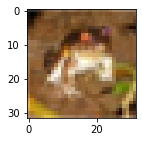

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [18]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [22]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [12]:
#Flatten y_train
y_train = y_train.reshape(-1,)

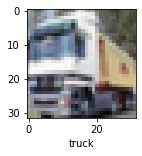

In [23]:
plot_sample(X_train, y_train, 1)

In [26]:
#Normalize our RGB data
X_train = X_train/255
X_test = X_test/255

In [27]:
X_train

array([[[[0.00090734, 0.00095348, 0.00096886],
         [0.00066128, 0.00070742, 0.00069204],
         [0.00076894, 0.00073818, 0.00066128],
         ...,
         [0.00242983, 0.00202999, 0.0016609 ],
         [0.00233756, 0.00192234, 0.00156863],
         [0.00227605, 0.00190696, 0.00158401]],

        [[0.00024606, 0.00030757, 0.00030757],
         [0.        , 0.        , 0.        ],
         [0.00027682, 0.00012303, 0.        ],
         ...,
         [0.00189158, 0.00135333, 0.00084583],
         [0.00183007, 0.00127643, 0.00076894],
         [0.0018762 , 0.00133795, 0.00087659]],

        [[0.00038447, 0.00036909, 0.00032295],
         [0.00024606, 0.00010765, 0.        ],
         [0.00075356, 0.00041522, 0.00012303],
         ...,
         [0.00181469, 0.00129181, 0.00076894],
         [0.00184544, 0.00129181, 0.00076894],
         [0.00167628, 0.00112265, 0.00064591]],

        ...,

        [[0.00319877, 0.00261438, 0.00147636],
         [0.00309112, 0.00235294, 0.00052288]

In [30]:
#Build an Artificial Neural Network
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [31]:
ann.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 2.3009 - accuracy: 0.1204
Epoch 2/10
1563/1563 [==============================] - 73s 46ms/step - loss: 2.2998 - accuracy: 0.1397
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 2.2990 - accuracy: 0.1428
Epoch 4/10
1563/1563 [==============================] - 110s 70ms/step - loss: 2.2981 - accuracy: 0.1496
Epoch 5/10
1563/1563 [==============================] - 111s 71ms/step - loss: 2.2969 - accuracy: 0.1476
Epoch 6/10
1563/1563 [==============================] - 107s 69ms/step - loss: 2.2956 - accuracy: 0.1623
Epoch 7/10
1563/1563 [==============================] - 101s 64ms/step - loss: 2.2940 - accuracy: 0.1550
Epoch 8/10
1563/1563 [==============================] - 103s 66ms/step - loss: 2.2919 - accuracy: 0.1708
Epoch 9/10
1563/1563 [==============================] - 102s 65ms/step - loss: 2.2892 - accuracy: 0.1759
Epoch 10/10
1563/1563 [==============================] - 9

In [32]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 2.2830 - accuracy: 0.2091


[2.282987117767334, 0.20909999310970306]

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [35]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 5s 16ms/step


In [36]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [37]:
print('Classification Report: \n', classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.35      0.37      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.15      0.79      0.25      1000
           7       0.16      0.12      0.14      1000
           8       0.42      0.25      0.31      1000
           9       0.24      0.58      0.34      1000

    accuracy                           0.21     10000
   macro avg       0.14      0.21      0.14     10000
weighted avg       0.14      0.21      0.14     10000



C:\Users\Fredrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fredrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fredrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# We will now use Convolution Neural Network to improve the performance of our Artificial Neural Network

### We will add the following layers before our ANN

####  1. Convolution + RelU
#### 2. Pooling Layer
#### 3. Convolution  + ReLU
#### 4. Pooling
#### 5. Dense Network - our ANN

In [43]:
#Build an Artificial Neural Network
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    #Dense - ANN
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [44]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3028 - accuracy: 0.0968
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3028 - accuracy: 0.1002
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3028 - accuracy: 0.0971
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.3028 - accuracy: 0.0983
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3028 - accuracy: 0.0954
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3028 - accuracy: 0.0972
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3028 - accuracy: 0.0993
Epoch 10/10
1563/1563 [==============================] - 35s 22m

## The model now improves to 96% with CNN

In [45]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 29s 19ms/step - loss: 2.3028 - accuracy: 0.0969
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 2.3027 - accuracy: 0.1001
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 2.3028 - accuracy: 0.0997
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 2.3028 - accuracy: 0.0975
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.3028 - accuracy: 0.0983
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 2.3028 - accuracy: 0.1005
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3028 - accuracy: 0.0979
Epoch 10/10
1563/1563 [==============================] - 34s 22m

### This now improves to 99%

In [46]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026225566864014, 0.10000000149011612]

In [48]:
y_test = y_test.reshape(-1,)

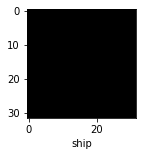

In [50]:
plot_sample(X_test, y_test, 1)

In [51]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [52]:
y_pred[:5]

array([[0.09897132, 0.10075854, 0.1011952 , 0.09930508, 0.09988505,
        0.10087039, 0.09966529, 0.09842414, 0.10075002, 0.10017488],
       [0.09897132, 0.10075854, 0.1011952 , 0.09930508, 0.09988505,
        0.10087039, 0.09966529, 0.09842414, 0.10075002, 0.10017488],
       [0.09897132, 0.10075854, 0.1011952 , 0.09930508, 0.09988505,
        0.10087039, 0.09966529, 0.09842414, 0.10075002, 0.10017488],
       [0.09897132, 0.10075854, 0.1011952 , 0.09930508, 0.09988505,
        0.10087039, 0.09966529, 0.09842414, 0.10075002, 0.10017488],
       [0.09897132, 0.10075854, 0.1011952 , 0.09930508, 0.09988505,
        0.10087039, 0.09966529, 0.09842414, 0.10075002, 0.10017488]],
      dtype=float32)

In [53]:
y_classes = [np.argmax(element) for element in y_pred]

In [54]:
y_classes[:5]

[2, 2, 2, 2, 2]

In [55]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [56]:
classes[y_classes[1]]

'bird'

In [57]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\Fredrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fredrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fredrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
